In [82]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
import slab as s
reload(s)
from slab import SlabOut, CoolingOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

In [83]:
G0 = 1.
xi_CR = 1.0e-16
Zd = 1. 

In [184]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"
slab = SlabOut(dir_out+"out_sn_cooling/", Zd=Zd) 
slab.ReadRates()
slab.ReadThermo()
cooling = CoolingOut(dir_out+"out_sn_cooling/", Zd=Zd) 
cooling.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


In [177]:
fH2_cr = cu.fH2_CR(slab.nHM, kcr=xi_CR, Zd=Zd)
diff_H2 = abs(cooling.abd["H2"]-fH2_cr)

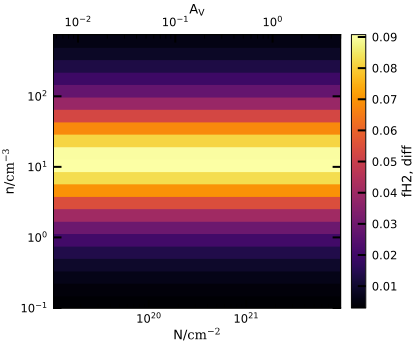

In [30]:
plot_chem.plot_abd(slab, "fH2, diff", plot_field=diff_H2)

In [31]:
fe = np.zeros(slab.nHM.shape)
fe_iter = np.zeros(slab.nHM.shape)
niter = np.zeros(slab.nHM.shape)
GPE = G0*np.exp(-1.87*slab.NHM*Zd/1.87e21)
GCI = G0*np.exp(-3.76*slab.NHM*Zd/1.87e21)
for i in xrange(slab.nHM.shape[0]):
    for j in xrange(slab.nHM.shape[1]):
        fe_iter[i, j], niter[i, j] = cu.fe_iter(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
                                                kcr=xi_CR, Zd=Zd)

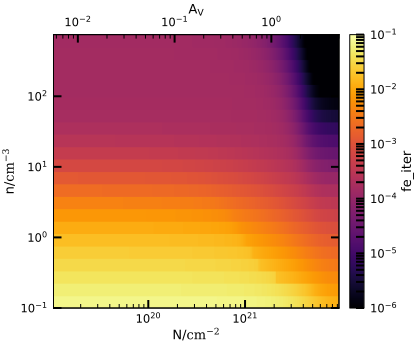

In [32]:
plot_chem.plot_abd(slab, "fe_iter", plot_field=fe_iter, norm=LogNorm(), vmax=0.1, vmin=1e-6)

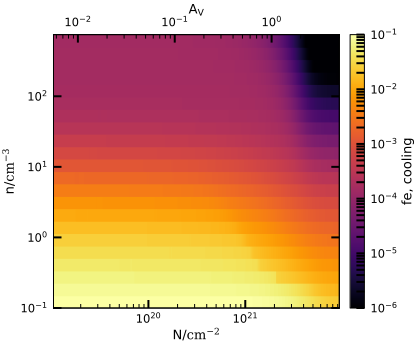

In [34]:
plot_chem.plot_abd(slab, "fe, cooling", plot_field=cooling.abd["e"], norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [55]:
diff_e_cooling = abs(cooling.abd["e"]/(slab.abd["e"]+1e-5)-1)
diff_e = abs(fe_iter/(slab.abd["e"]+1e-5)-1)

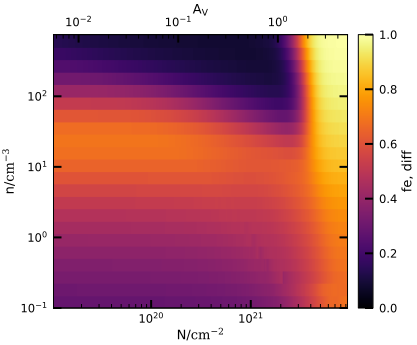

In [56]:
plot_chem.plot_abd(slab, "fe, diff", plot_field=diff_e, vmax=1, vmin=0)

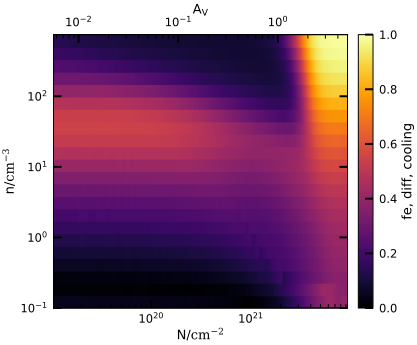

In [57]:
plot_chem.plot_abd(slab, "fe, diff, cooling", plot_field=diff_e_cooling, vmin=0, vmax=1)

In [60]:
fHplus_e = cu.fHplus_e(fe_iter, slab.nHM, slab.abd["T"], GPE, kcr=xi_CR, Zd=Zd)
fCplus_e = cu.fCplus_e(fe_iter, slab.nHM, slab.abd["T"], GPE, GCI, kcr=xi_CR, Zd=Zd)

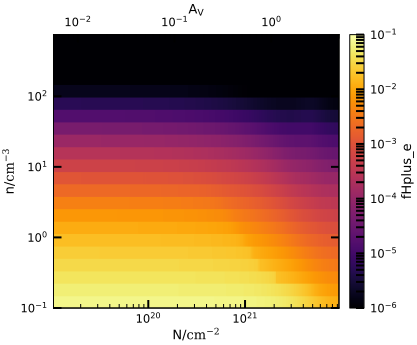

In [61]:
plot_chem.plot_abd(slab, "fHplus_e", plot_field=fHplus_e, norm=LogNorm(), vmax=0.1, vmin=1e-6)

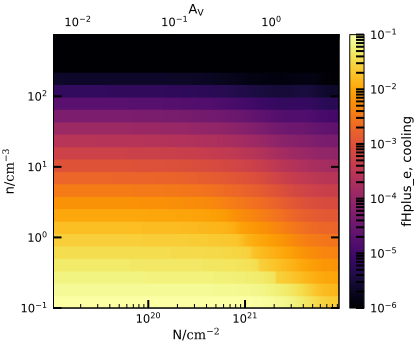

In [62]:
plot_chem.plot_abd(slab, "fHplus_e, cooling", plot_field=cooling.abd["H+"], norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [63]:
diff_Hplus_cooling = abs(cooling.abd["H+"]/(slab.abd["H+"]+1e-5)-1)
diff_Hplus = abs(fHplus_e/(slab.abd["H+"]+1e-5)-1)

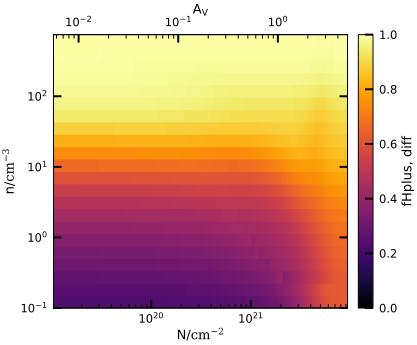

In [64]:
plot_chem.plot_abd(slab, "fHplus, diff", plot_field=diff_Hplus, vmax=1, vmin=0)

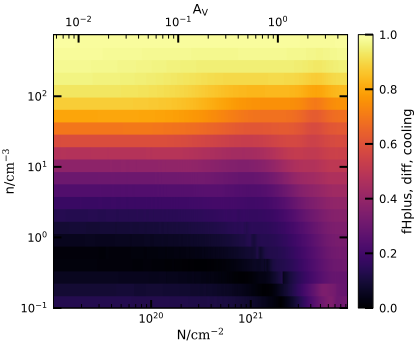

In [65]:
plot_chem.plot_abd(slab, "fHplus, diff, cooling", plot_field=diff_Hplus_cooling, vmax=1, vmin=0)

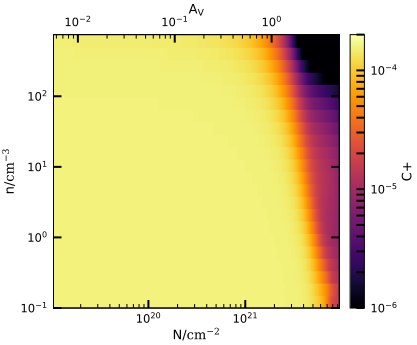

In [74]:
plot_chem.plot_abd(slab, "C+", norm=LogNorm(), vmax=2e-4, vmin=1e-6)

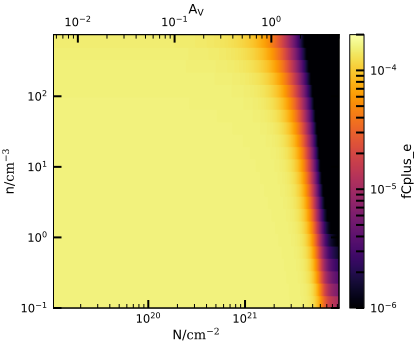

In [67]:
plot_chem.plot_abd(slab, "fCplus_e", plot_field=fCplus_e, norm=LogNorm(), vmax=2e-4, vmin=1e-6)

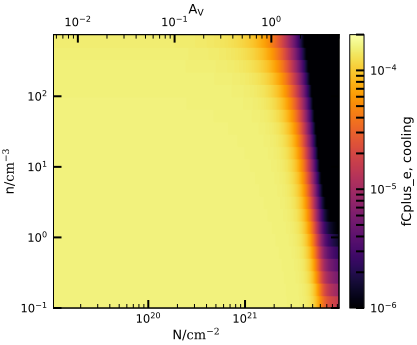

In [68]:
plot_chem.plot_abd(slab, "fCplus_e, cooling", plot_field=cooling.abd["C+"], norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [71]:
diff_Cplus_cooling = abs(cooling.abd["C+"]/(slab.abd["C+"]+1e-5)-1)
diff_Cplus = abs(fCplus_e/(slab.abd["C+"]+1e-5)-1)

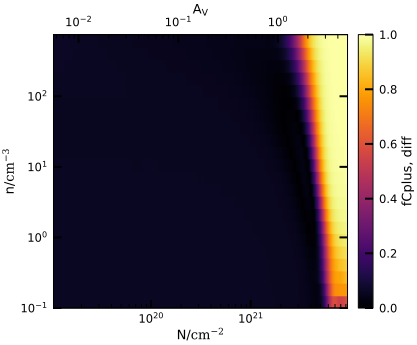

In [72]:
plot_chem.plot_abd(slab, "fCplus, diff", plot_field=diff_Cplus, vmax=1, vmin=0)

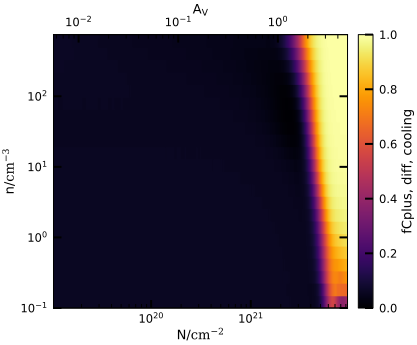

In [73]:
plot_chem.plot_abd(slab, "fCplus, diff, cooling", plot_field=diff_Cplus_cooling, vmax=1, vmin=0)

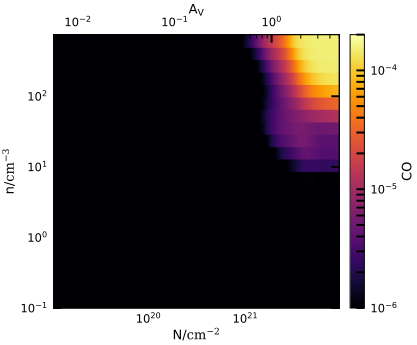

In [75]:
plot_chem.plot_abd(slab, "CO", norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [76]:
GCO = G0*np.exp(-3.88*slab.NHM*Zd/1.87e21)
fCO = cu.fCO(slab.nHM, fCplus_e, fH2_cr, GCO, kcr=xi_CR, Zd=Zd)

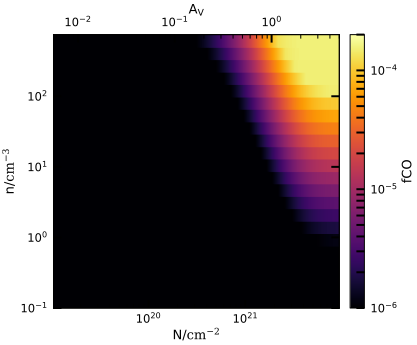

In [77]:
plot_chem.plot_abd(slab, "fCO", plot_field=fCO, norm=LogNorm(), vmax=2e-4, vmin=1e-6)

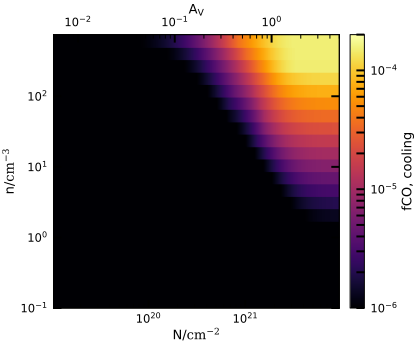

In [78]:
plot_chem.plot_abd(slab, "fCO, cooling", plot_field=cooling.abd["CO"], norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [82]:
diff_CO_cooling = abs((cooling.abd["CO"]-slab.abd["CO"])/(slab.abd["CO"]+1e-5))
diff_CO = abs( (fCO-slab.abd["CO"])/(slab.abd["CO"]+1e-5))

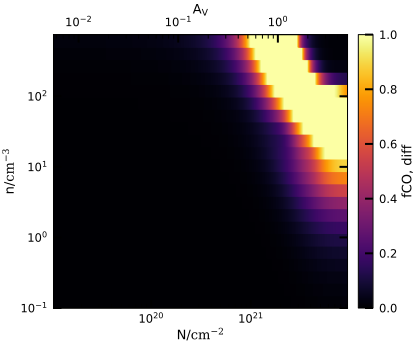

In [83]:
plot_chem.plot_abd(slab, "fCO, diff", plot_field=diff_CO, vmax=1, vmin=0)

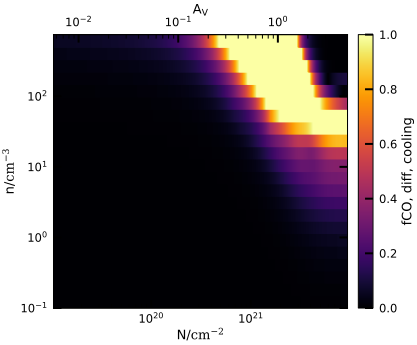

In [84]:
plot_chem.plot_abd(slab, "fCO, diff, cooling", plot_field=diff_CO_cooling, vmax=1, vmin=0)

In [190]:
def plot_thermo_nH(ax, plot_slab, plot_nH,linestyle="-", label="", plot_unimportant = False, plot_legend=True):
    #important heating processes:
    ax.plot(plot_slab.NH, plot_slab.GetAbd("LPE", nH=plot_nH), color="orange", linestyle=linestyle, label="LPE, "+label)
    ax.plot(plot_slab.NH, plot_slab.GetAbd("LCR", nH=plot_nH), color="m", linestyle=linestyle, label="LCR")
    ax.plot(plot_slab.NH, plot_slab.GetAbd("Ltotal", nH=plot_nH), color="r", linestyle=linestyle, label="Ltotal", 
            linewidth=4)
    #important cooling processes:
    ax.plot(plot_slab.NH, plot_slab.GetAbd("GLya", nH=plot_nH), color="g",linestyle=linestyle, label="GLya")
    ax.plot(plot_slab.NH, plot_slab.GetAbd("GRec", nH=plot_nH), color="navy", linestyle=linestyle, label="GRec")
    ax.plot(plot_slab.NH, plot_slab.GetAbd("GOI", nH=plot_nH), color="lightblue", linestyle=linestyle, label="GOI")  
    ax.plot(plot_slab.NH, plot_slab.GetAbd("GCII", nH=plot_nH), color="cyan", linestyle=linestyle, label="GCII")
    ax.plot(plot_slab.NH, plot_slab.GetAbd("GCI", nH=plot_nH), color="olive", linestyle=linestyle, label="GCI")
    ax.plot(plot_slab.NH, plot_slab.GetAbd("GCOR", nH=plot_nH), color="lawngreen", linestyle=linestyle, label="GCOR")
    ax.plot(plot_slab.NH, plot_slab.GetAbd("Gtotal", nH=plot_nH), color="b", linestyle=linestyle, label="Gtotal", 
            linewidth=2.5)
    #unimportant processes:
    if plot_unimportant:
        ax.plot(plot_slab.NH, plot_slab.GetAbd("LH2diss", nH=plot_nH), color="y", linestyle="-", label="LH2diss")
        ax.plot(plot_slab.NH, plot_slab.GetAbd("LH2pump", nH=plot_nH), color="chocolate", linestyle="-", label="LH2pump")
        ax.plot(plot_slab.NH, plot_slab.GetAbd("LH2gr", nH=plot_nH), color="pink", linestyle="-", label="LH2gr")
        ax.plot(plot_slab.NH, plot_slab.GetAbd("GH2", nH=plot_nH), color="yellowgreen", linestyle="-", label="GH2")
        ax.plot(plot_slab.NH, plot_slab.GetAbd("GDust", nH=plot_nH), color="skyblue", linestyle="-", label="GDust")
        ax.plot(plot_slab.NH, plot_slab.GetAbd("GH2diss", nH=plot_nH), color="turquoise", linestyle="-", label="GH2diss")
        ax.plot(plot_slab.NH, plot_slab.GetAbd("GHIion", nH=plot_nH), color="indigo", linestyle="-", label="GHIion")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim([1e-30, 1e-24])
    ax.set_xlim([plot_slab.NH[0], plot_slab.NH[-1]])
    ax2 = ax.twinx()
    ax2.plot(plot_slab.NH, plot_slab.GetAbd("e", nH=plot_nH), color="k", linestyle=linestyle, label="e",
            linewidth=2)
    ax2.plot(plot_slab.NH, plot_slab.GetAbd("H+", nH=plot_nH), color="silver", linestyle=linestyle, label="H+", 
            linewidth=3)
    ax2.plot(plot_slab.NH, plot_slab.GetAbd("C2Ctot", nH=plot_nH), color="gray", linestyle=linestyle,
            label="C/Ctot",linewidth=2)
    ax2.plot(plot_slab.NH, plot_slab.GetAbd("CO2Ctot", nH=plot_nH), color="brown", linestyle=linestyle,
            label="CO/Ctot", linewidth=3)
   
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylim([1e-4, 2])
    ax2.set_xlim([plot_slab.NH[0], plot_slab.NH[-1]])
    if plot_legend:
        ax.legend(fontsize=10, loc=3)
        ax2.legend(fontsize=10, loc=2)
    ax.set_xlabel("$N_H/cm^{-2}$")
    ax2.set_ylabel("$T2, 2x_{H_2}, x_{CO}/x_{Ctot}, x_{C^+}/x_{Ctot}$")
    ax.set_ylabel("$\Lambda(\Gamma) / \mathrm{erg^{}s^{-1}H^{-1}}$")
    ax.set_title("Heating and cooling, nH={:.1f}".format(plot_nH), fontsize=10)
    return

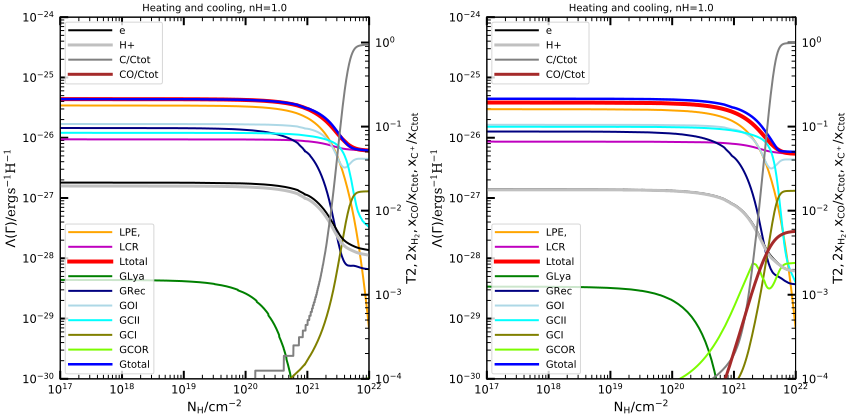

In [191]:
nH = 1
fig = plt.figure(figsize=[12, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_thermo_nH(ax1, slab, nH, plot_unimportant=False)
plot_thermo_nH(ax2, cooling, nH)

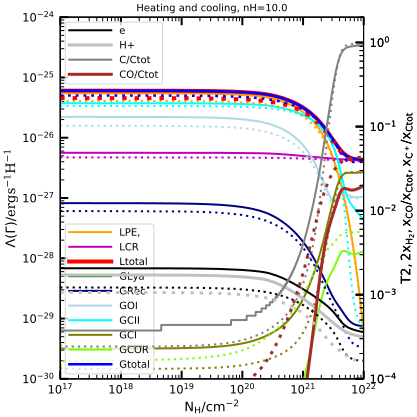

In [192]:
nH = 10
fig = plt.figure(figsize=[6, 6])
ax1 = fig.add_subplot(111)
plot_thermo_nH(ax1, slab, nH)
plot_thermo_nH(ax1, cooling, nH, linestyle=":", plot_legend=False)

In [150]:
print slab.GetAbd("H", nH=0.1, NH=1e17)/0.891

1.0172681309215459


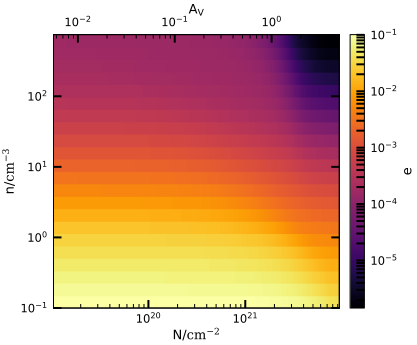

In [122]:
plot_chem.plot_abd(slab, "e", norm=LogNorm())

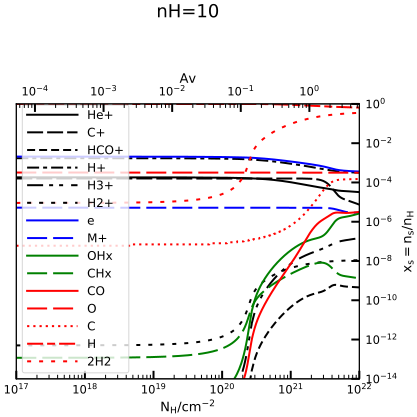

In [189]:
#abundances comparison
plot_slab1 = slab
Zd = 1.
#plot_nH_arr = Wolfire_slab.nH
plot_nH_arr = [10]

plot_spec_list=["He+", "C+", "HCO+", "H+", "H3+", 
                "H2+", "e", "M+", "OHx", "CHx", "CO", "O", "C", "H", "2H2"]
len_spec = len(plot_spec_list)
ic_arr = np.linspace(0, 1, len_spec)
colors = ["k"]*6 + ["b"]*2 + ["g"]*2 + ["r"]*5
colors2 = ["gray"]*6 + ["cyan"]*2 + ["yellow"]*2 + ["m"]*5
#colors = [cm.jet(ic) for ic in ic_arr]
linestyles = ["-", "-.", "-.", "-.", "-.", "-."] + ["-", "--"] + ["-", "--", "-", "--", ":", "-.", "-."]
seqs = [[8, 2, 8, 2], [4, 2, 4, 2], [6, 2, 2, 2], [8, 3, 2, 3, 2, 4], [2, 4, 2, 4], [8, 2, 4, 2], [2, 4, 2, 4]]
indxs = np.arange(len_spec)
savefig=False

for plot_nH in plot_nH_arr:
    plot_nH = int(plot_nH)
    figname = "species_nH"+str(plot_nH)
    fig=plt.figure(figsize=[6,6])
    ax = fig.add_subplot(111)
    seqi=0
    for s,i in zip(plot_spec_list, indxs):
        if s == "OH" or s == "CH":
            s_label = s + "x"
        else:
            s_label = s
        #print "s={}, NHshape={}, abdshape={}".format(s, plot_slab1.NH.shape, plot_slab1.GetAbd(s, nH=plot_nH).shape)
        line = ax.plot(plot_slab1.NH, plot_slab1.GetAbd(s, nH=plot_nH), label=s_label, 
                       color=colors[i], linestyle=linestyles[i])
        if linestyles[i] == "-.":
            line[0].set_dashes(seqs[seqi])
            seqi = seqi+1

    ax.set_xlim([1e17/Zd, 1e22/Zd]);
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.legend(fontsize=12, loc=3)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_xlabel("$N_H/cm^{-2}$")
    ax.set_ylabel("$x_s = n_s/n_H$")
    ax3 = ax.twiny()
    ax3.plot(plot_slab1.NH/1.87e21 * Zd, plot_slab1.GetAbd("e", nH=plot_nH), color="gray", linestyle="none")
    ax3.set_xlim(np.array(ax.get_xlim())/1.87e21 * Zd)
    ax3.set_xscale(ax.get_xscale())
    ax3.set_xlabel("Av")
    ax3.set_ylim([1e-14, 1])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title("nH={:d}\n\n\n\n".format(plot_nH), fontsize=18)
    fig.tight_layout()

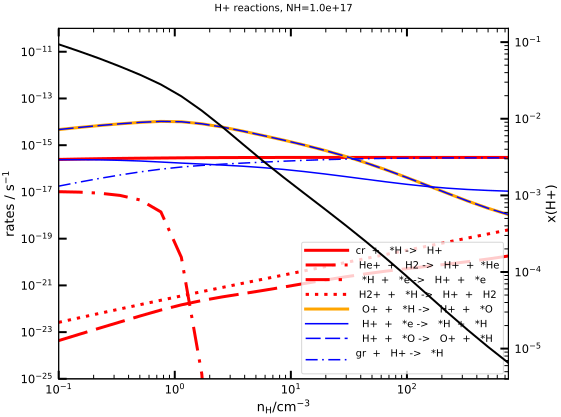

In [193]:
plot_chem.plot_rates_NH(slab, 1e17, "H+")